# Example 3: Classification

## Regression formulation

Let's first treat the problem as a regression problem (output dimension = 1, MSE loss). 

create the two moon dataset

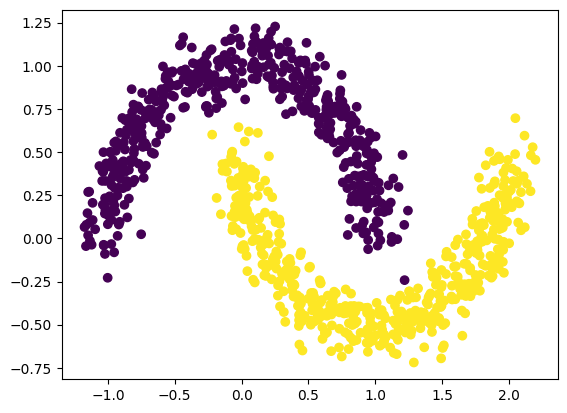

In [1]:
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np

dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input)
dataset['test_input'] = torch.from_numpy(test_input)
dataset['train_label'] = torch.from_numpy(train_label[:,None])
dataset['test_label'] = torch.from_numpy(test_label[:,None])

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:,0])

In [8]:
X.min(), X.max(), X.mean(), X.std()

(tensor(-1.1757, dtype=torch.float64),
 tensor(2.1996, dtype=torch.float64),
 tensor(0.3723, dtype=torch.float64),
 tensor(0.7252, dtype=torch.float64))

In [17]:
dataset['train_input'][:, 0]

tensor([-1.6163e-01,  5.5267e-01,  1.9584e+00, -1.6490e-03,  4.3272e-01,
        -9.8231e-01,  6.6041e-01, -1.0355e+00,  1.7346e+00, -4.7078e-01,
         2.0710e+00,  2.2953e-01, -1.1536e+00,  1.5305e+00, -7.6505e-03,
         1.7840e+00, -7.3993e-01,  3.1960e-01,  4.6993e-01,  1.6830e+00,
         6.0027e-01, -1.0433e+00,  1.5750e+00,  1.0447e+00,  6.9526e-01,
         1.3572e+00,  1.4324e-01,  7.3933e-01, -6.3962e-01,  1.3852e+00,
         8.0336e-01,  2.8688e-01,  1.9268e+00, -5.2532e-01,  7.5307e-01,
         8.0296e-01,  8.9587e-01, -8.2501e-01, -1.3251e-01,  5.9652e-01,
         4.5891e-02, -8.2441e-01,  2.0261e+00, -1.3176e-02, -8.7232e-01,
         5.7710e-01,  1.5375e-01,  2.0223e+00, -1.0219e+00,  1.1178e+00,
         5.5413e-01,  1.7289e+00,  1.9804e-01,  1.9318e+00,  3.1956e-01,
        -8.0292e-01,  2.0595e+00,  1.7544e-01,  2.8257e-01, -6.4949e-02,
         1.4792e+00,  2.2078e-01,  4.2849e-01, -5.8784e-01,  2.0697e+00,
         6.4357e-01, -8.9775e-01,  1.8888e+00,  1.3

Train KAN

In [28]:
model = KAN(width=[2,1], grid=3, k=3, symbolic_enabled=False)
'''
width=None, grid=3, k=3, noise_scale=0.1, noise_scale_base=0.1, 
base_fun=torch.nn.SiLU(), symbolic_enabled=True, bias_trainable=True, 
grid_eps=1.0, grid_range=[-1, 1], sp_trainable=True, sb_trainable=True,
device='cpu', seed=0):
'''

"\nwidth=None, grid=3, k=3, noise_scale=0.1, noise_scale_base=0.1, \nbase_fun=torch.nn.SiLU(), symbolic_enabled=True, bias_trainable=True, \ngrid_eps=1.0, grid_range=[-1, 1], sp_trainable=True, sb_trainable=True,\ndevice='cpu', seed=0):\n"

In [29]:
model

KAN(
  (biases): ModuleList(
    (0): Linear(in_features=1, out_features=1, bias=False)
  )
  (act_fun): ModuleList(
    (0): KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0): Symbolic_KANLayer()
  )
)

In [2]:
model = KAN(width=[2,1], grid=3, k=3)

def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc));
results['train_acc'][-1], results['test_acc'][-1]

train loss: 1.49e-01 | test loss: 1.63e-01 | reg: 3.31e+00 : 100%|██| 20/20 [00:01<00:00, 12.00it/s]


(0.9990000128746033, 0.9980000257492065)

In [2]:
model = KAN(width=[2,1], grid=3, k=3, symbolic_enabled=False)

def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc));
results['train_acc'][-1], results['test_acc'][-1]

train loss: 1.54e-01 | test loss: 1.53e-01 | reg: 3.24e+00 : 100%|██| 20/20 [00:01<00:00, 13.97it/s]


(0.9990000128746033, 0.9990000128746033)

In [3]:
model

KAN(
  (biases): ModuleList(
    (0): Linear(in_features=1, out_features=1, bias=False)
  )
  (act_fun): ModuleList(
    (0): KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0): Symbolic_KANLayer()
  )
)

Automatic symbolic regression

In [3]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]
formula

fixing (0,0,0) with sin, r2=0.9766256715085356
fixing (0,1,0) with tan, r2=0.979458342597993


-0.4*sin(3.1*x_1 - 1.53) - 0.77*tan(0.96*x_2 + 9.2) + 0.52

In [4]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]
formula

fixing (0,0,0) with sin, r2=0.9769032033983616
fixing (0,1,0) with tan, r2=0.9794770075380549


-0.39*sin(3.07*x_1 - 7.83) - 0.79*tan(0.93*x_2 - 3.39) + 0.48

How accurate is this formula?

In [4]:
# how accurate is this formula?
def acc(formula, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        correct += np.round(np.array(formula.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)) == y[i,0]
    return correct/batch

print('train acc of the formula:', acc(formula, dataset['train_input'], dataset['train_label']))
print('test acc of the formula:', acc(formula, dataset['test_input'], dataset['test_label']))

train acc of the formula: tensor(0.9990)
test acc of the formula: tensor(1.)


In [5]:
# how accurate is this formula?
def acc(formula, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        correct += np.round(np.array(formula.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)) == y[i,0]
    return correct/batch

print('train acc of the formula:', acc(formula, dataset['train_input'], dataset['train_label']))
print('test acc of the formula:', acc(formula, dataset['test_input'], dataset['test_label']))

train acc of the formula: tensor(0.9990)
test acc of the formula: tensor(0.9980)


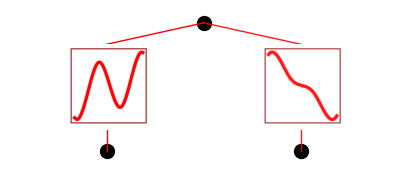

In [5]:
model.plot()

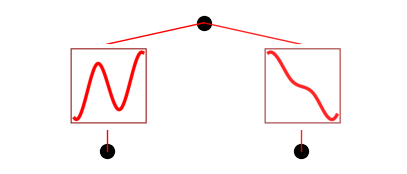

In [6]:
model.plot()

## Classification formulation

Let's then treat the problem as a classification problem (output dimension = 2, CrossEntropy loss). 

Create the two moon datatset

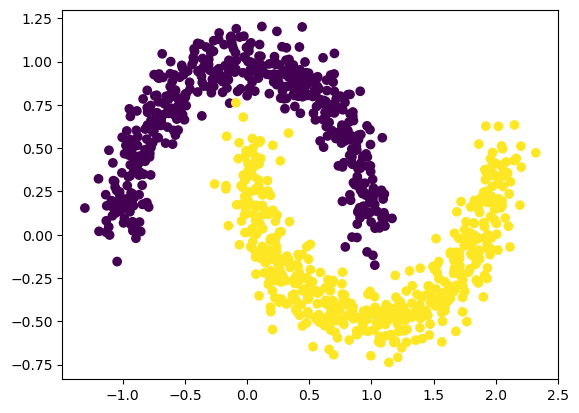

In [5]:
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np

dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input)
dataset['test_input'] = torch.from_numpy(test_input)
dataset['train_label'] = torch.from_numpy(train_label)
dataset['test_label'] = torch.from_numpy(test_label)

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:])

### Train KAN

In [6]:
model = KAN(width=[2,2], grid=3, k=3)

def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss());

train loss: 4.71e-10 | test loss: 6.99e-01 | reg: 1.10e+03 : 100%|██| 20/20 [00:02<00:00,  9.84it/s]


Automatic symbolic regression

In [7]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.8303828486153692
fixing (0,0,1) with sin, r2=0.7801497677237067
fixing (0,1,0) with x^3, r2=0.9535787267982471
fixing (0,1,1) with x^3, r2=0.9533594412300308


In [8]:
formula1, formula2 = model.symbolic_formula()[0]
formula1

-3113.07*(0.21 - x_2)**3 - 807.36*sin(3.13*x_1 + 1.42) - 120.29

In [9]:
formula2

3027.89*(0.21 - x_2)**3 + 908.57*sin(3.19*x_1 + 1.4) + 172.29

How accurate is this formula?

In [10]:
# how accurate is this formula?
def acc(formula1, formula2, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        logit1 = np.array(formula1.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)
        logit2 = np.array(formula2.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)
        correct += (logit2 > logit1) == y[i]
    return correct/batch

print('train acc of the formula:', acc(formula1, formula2, dataset['train_input'], dataset['train_label']))
print('test acc of the formula:', acc(formula1, formula2, dataset['test_input'], dataset['test_label']))

train acc of the formula: tensor(0.9700)
test acc of the formula: tensor(0.9660)
